In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload 2

In [3]:
asso_IE50_reci = pd.read_pickle('/data/ana_asso_IE_50Hz_reci')
asso_IE50_uni = pd.read_pickle('/data/ana_asso_IE_50Hz_uni')
asso_IE50 = pd.read_pickle('/data/ana_asso_IE_50Hz')

In [4]:
asso_IE50_reci

,Before,After,File name,elimi
45,"{'raw_amp1': [1.53457080344e-11, 4.18009319135...","{'raw_amp1': [3.75126876707e-11, 3.32205082019...",2016100202,40
46,"{'raw_amp1': [3.2058778905e-11, 5.33281711381e...","{'raw_amp1': [4.37389103394e-11, 6.11997659785...",2016110202,40
47,"{'raw_amp1': [3.60684249647e-11, 2.60433046478...","{'raw_amp1': [2.23279222917e-11, 3.16831559829...",2016111103,40
48,"{'raw_amp1': [6.76359594296e-11, 5.47097188749...","{'raw_amp1': [5.42667787554e-11, 6.53925025815...",2016111802,30
50,"{'raw_amp1': [3.44910552585e-11, 3.09786228464...","{'raw_amp1': [3.17341433622e-11, 2.13377039125...",2016111104,15


In [5]:
asso_IE50_uni

,Before,After,File name,elimi
40,"{'raw_amp1': [3.40151660927e-11, 2.21836780362...","{'raw_amp1': [3.47565605788e-11, 3.72555757808...",2016102702,40
41,"{'raw_amp1': [2.30952293758e-11, 1.93596049984...","{'raw_amp1': [1.45248159235e-11, 9.64690848753...",2016111001,55
42,"{'raw_amp1': [1.14657539819e-11, nan, 3.671953...","{'raw_amp1': [nan, nan, 5.35720283024e-12, nan...",2016120201,40
43,"{'raw_amp1': [6.49198424194e-11, 8.87547636394...","{'raw_amp1': [5.29204832929e-11, 5.32675950859...",2016120501,50
44,"{'raw_amp1': [5.05768648027e-11, 3.17721362823...","{'raw_amp1': [2.6332042819e-11, 2.34569278923e...",2017050901,50
49,"{'raw_amp1': [6.66052493837e-11, 2.41817549971...","{'raw_amp1': [1.11043103197e-11, 1.67567799143...",2016100203,15
51,"{'raw_amp1': [2.65307867855e-11, 3.01850364462...","{'raw_amp1': [3.82449617845e-11, 4.48991544468...",2016120403,20


In [6]:
asso_IE50

,Before,After,File name,elimi
40,"{'raw_amp1': [3.40151660927e-11, 2.21836780362...","{'raw_amp1': [3.47565605788e-11, 3.72555757808...",2016102702,40
41,"{'raw_amp1': [2.30952293758e-11, 1.93596049984...","{'raw_amp1': [1.45248159235e-11, 9.64690848753...",2016111001,55
42,"{'raw_amp1': [1.14657539819e-11, nan, 3.671953...","{'raw_amp1': [nan, nan, 5.35720283024e-12, nan...",2016120201,40
43,"{'raw_amp1': [6.49198424194e-11, 8.87547636394...","{'raw_amp1': [5.29204832929e-11, 5.32675950859...",2016120501,50
44,"{'raw_amp1': [5.05768648027e-11, 3.17721362823...","{'raw_amp1': [2.6332042819e-11, 2.34569278923e...",2017050901,50
49,"{'raw_amp1': [6.66052493837e-11, 2.41817549971...","{'raw_amp1': [1.11043103197e-11, 1.67567799143...",2016100203,15
51,"{'raw_amp1': [2.65307867855e-11, 3.01850364462...","{'raw_amp1': [3.82449617845e-11, 4.48991544468...",2016120403,20
45,"{'raw_amp1': [1.53457080344e-11, 4.18009319135...","{'raw_amp1': [3.75126876707e-11, 3.32205082019...",2016100202,40
46,"{'raw_amp1': [3.2058778905e-11, 5.33281711381e...","{'raw_amp1': [4.37389103394e-11, 6.11997659785...",2016110202,40
47,"{'raw_amp1': [3.60684249647e-11, 2.60433046478...","{'raw_amp1': [2.23279222917e-11, 3.16831559829...",2016111103,40


/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


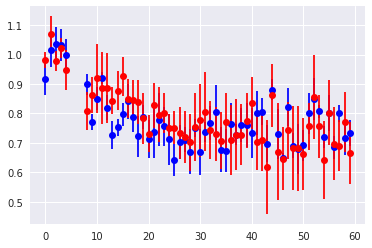

In [8]:
ave_ptl_resp = np.ones((len(pre_IE50_reci), 60))*np.nan

ave_ptl_mean_50reci,ave_ptl_ste_50reci = patch_pip.samp_ave(asso_IE50_reci, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50reci)), y=ave_ptl_mean_50reci, yerr=ave_ptl_ste_50reci, fmt='bo')

ave_ptl_resp = np.ones((len(pre_IE50_uni), 60))*np.nan
ave_ptl_mean_50uni,ave_ptl_ste_50uni = patch_pip.samp_ave(asso_IE50_uni, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50uni)), y=ave_ptl_mean_50uni, yerr=ave_ptl_ste_50uni, fmt='ro')

/src/Patch_ana/Patch_ana/patch_pip.py:471: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


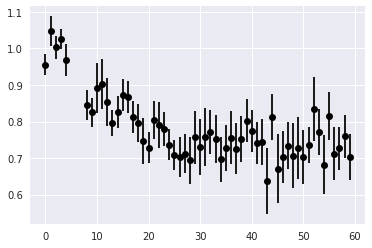

In [9]:
ave_ptl_resp = np.ones((len(asso_IE50), 60))*np.nan
ave_ptl_mean_50,ave_ptl_ste_50 = patch_pip.samp_ave(asso_IE50, ave_ptl_resp)
plt.errorbar(x=np.arange(len(ave_ptl_mean_50)), y=ave_ptl_mean_50, yerr=ave_ptl_ste_50, fmt='ko')

[0, 60, 0.2, 1.6]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


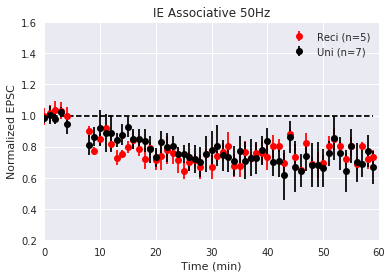

In [13]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_50reci,ave_ptl_ste_50reci 
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='ro', label='Reci (n={a})'.format(a=len(pre_IE50_reci)))

ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50uni,ave_ptl_ste_50uni
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='Uni (n={a})'.format(a=len(pre_IE50_uni)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('IE Associative 50Hz')
plt.axis([0,60,0.2,1.6])

[0, 60, 0.2, 1.6]

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


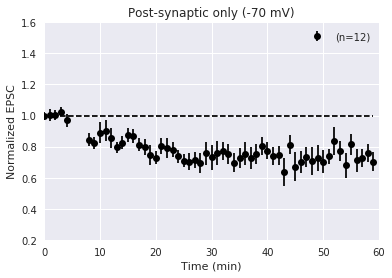

In [11]:
ave_ptl_mean_50cp, ave_ptl_ste_50cp =  ave_ptl_mean_50,ave_ptl_ste_50
ave_ptl_mean, ave_ptl_ste= patch_pip.pro_bef(ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5])
ave_ptl_mean_50cp[:5], ave_ptl_ste_50cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.arange(len(ave_ptl_mean_50cp)), y=ave_ptl_mean_50cp, yerr=ave_ptl_ste_50cp, fmt='ko', label='(n={a})'.format(a=len(pre_IE50)))

plt.plot(np.ones((60))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
plt.legend()
plt.title('Post-synaptic only (-70 mV)')
plt.axis([0,60,0.2,1.6])